In [122]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to /home/bl481/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# The vectors

In [248]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('yeah')
stopwords.append('yeah')
stopwords.append('okay')
stopwords.append('oh')
stopwords.append('hey')
stopwords.append('know')
stopwords.append('right')
stopwords.append('uh')
stopwords.append('well')
stopwords.append('guy')
stopwords.append('look')
stopwords.append('got')
stopwords.append('go')
stopwords.append('im')
stopwords.append('really')
stopwords.append('don')
stopwords.append("don't")
stopwords.append('gonna')
stopwords.append('good')
stopwords.append('think')
stopwords.append('nt')
stopwords.append("you're")
stopwords.append("mean")
stopwords.append("like")
stopwords.append("get")
stopwords.append("let")
stopwords.append("um")
stopwords.append("umm")
stopwords.append("god")

# Word Cloud

inspired by https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

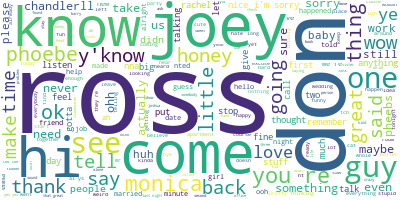

In [249]:
#The word cloud for Rachel
chara=pd.read_csv("../../data/Characters/Rachel.csv")
char2=[]
for i in range(1,11):
    for j in range(1,26):
        if len(chara.loc[(chara.season==i) & (chara.episode==j)])>0:
            char2.append(' '.join(' '.join([str(t) for t in chara.loc[(chara.season==i) & (chara.episode==j)].line.values]).replace(',',' ').replace('.',' ').replace('wa-',' ').replace('wa',' ').replace('!',' ').replace('?',' ').replace('-',' ').split()))


char_all=[]
for sentence in char2:
    words=sentence.split(' ')
    for item in words:
        if not item in stopwords:
            char_all.append(item)


from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=200, contour_width=5, contour_color='steelblue')
long_string0 = ' '.join(char_all)
wordcloud.generate(long_string0)
wordcloud.to_image()


# LDA

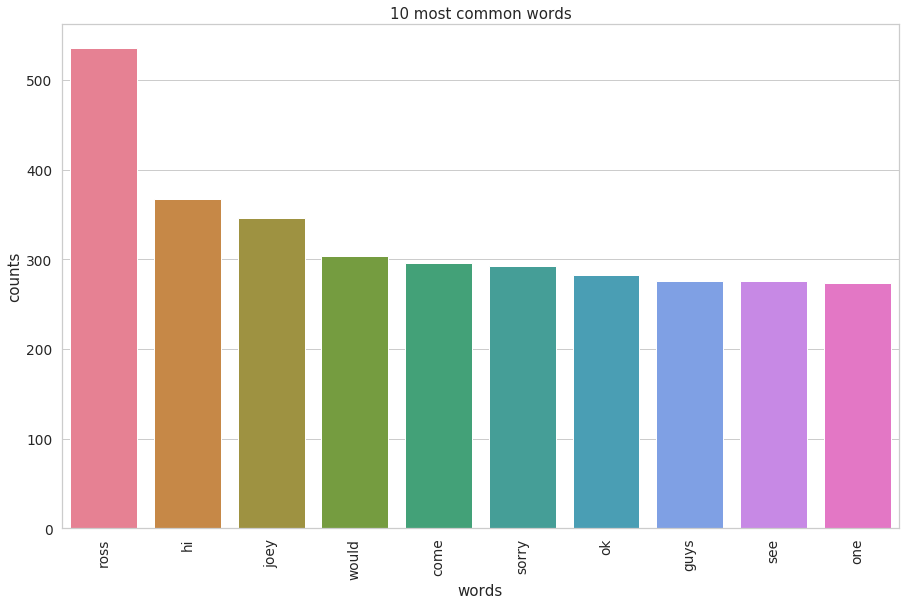

In [250]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords)
# Fit and transform the processed titles
count_data0 = count_vectorizer.fit_transform(char2)
# Visualise the 10 most common words
plot_10_most_common_words(count_data0, count_vectorizer)

In [251]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [252]:
from sklearn.decomposition import LatentDirichletAllocation

number_topics = 7
number_words = 10

lda = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1)
lda.fit(count_data0)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [253]:
lda.fit(count_data0)
print('Character\'s lines')
print_topics(lda, count_vectorizer, number_words)

Character's lines

Topic #0:
joey would see one hi guys come tell sorry wow

Topic #1:
ross ow love hi would sorry see guys much great

Topic #2:
ross ok hi phoebe sorry see come going would thank

Topic #3:
ross monica something chandler one come honey see phoebe pheebs

Topic #4:
ross joey come one hi guys monica phoebe sorry great

Topic #5:
would ok going sorry yes pheebs little hi ross guys

Topic #6:
ross hi would great yes sorry honey guys said time
